In [13]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

xgb.set_config(verbosity=0)
pd.set_option('display.max_rows', None)

### Reading in the data and EDA

In [3]:
df = pd.read_csv('insolvency_data.csv')

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
# quick check that there are no categorical vars 

df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [8]:
# Pandas profiling for quick,interactive EDA report

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [9]:
profile = ProfileReport(df.sample(5000), minimal=True)
profile.to_file(output_file="output_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

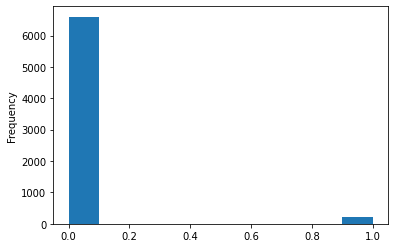

In [10]:
# Dataset is heavily imbalanced - will need to resample, e.g. using SMOTE 

df['Bankrupt?'].plot(kind='hist');

## Train-test split

In [11]:
# assign target values and features

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [14]:
# resample training set using SMOTE

sm = SMOTE()
X_r, y_r = sm.fit_resample(X_train, y_train)

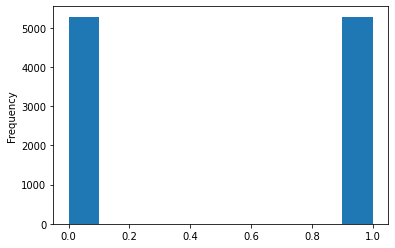

In [15]:
# show difference
y_r.plot(kind='hist'); 

## Baseline model: Multinomial NB

In [16]:
# fit classifier on resampled training data

classifier = MultinomialNB()
classifier.fit(X_r, y_r)

MultinomialNB()

In [18]:
# produce predictions

predictions = classifier.predict(X_test)

In [19]:
# evaluate

print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}") 

print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")


Accuracy of the classifier is: 0.6832844574780058
Precision Score of the classifier is: 0.05813953488372093
Recall Score of the classifier is: 0.4807692307692308
F1 Score of the classifier is: 0.10373443983402489


AUC for our classifier is: 0.5848088649155723


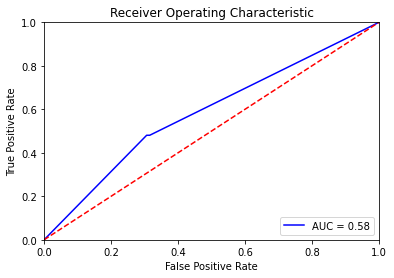

In [20]:
# AUC-ROC Curve

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
# pickle dump

path = 'Classifier.pkl'
with open(path, 'wb') as f:
    pickle.dump(classifier, f)

## XGBoost

In [21]:
xgb_classifier = XGBClassifier(learning_rate=0.02,
                            max_depth = 3, 
                            n_estimators = 100,
                              scale_pos_weight=2.4,
                              eval_metric='logloss')

In [22]:
# fit on train set with smote resampling
xgb_classifier.fit(X_r, y_r)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.4, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
# predict

xgb_predict=xgb_classifier.predict(X_test)

In [24]:
xgb_predict

array([0, 1, 0, ..., 0, 1, 0])

In [25]:
# evaluate performance

print(f"Accuracy of the classifier is: {accuracy_score(y_test, xgb_predict)}") 
print(f"Precision Score of the classifier is: {precision_score(y_test, xgb_predict)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, xgb_predict)}") #model's ability to correctly predict the positives out of actual positives
print(f"F1 Score of the classifier is: {f1_score(y_test, xgb_predict)}")


Accuracy of the classifier is: 0.8563049853372434
Precision Score of the classifier is: 0.2
Recall Score of the classifier is: 0.9230769230769231
F1 Score of the classifier is: 0.32876712328767127


In [26]:
# classification report

print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1312
           1       0.20      0.92      0.33        52

    accuracy                           0.86      1364
   macro avg       0.60      0.89      0.62      1364
weighted avg       0.97      0.86      0.90      1364



AUC for our classifier is: 0.9343193011257035


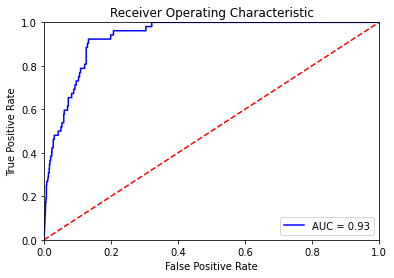

In [27]:
# AUC-ROC Curve

class_probabilities = xgb_classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [28]:
# k-fold crossvalidation on trainset

np.mean(cross_val_score(XGBClassifier(), X_r, y_r))

0.9873275316420307

In [31]:
# dump pickle 

path = 'XGBClassifier.pkl'
with open(path, 'wb') as f:
    pickle.dump(xgb_classifier, f)